BehaviorSpace results (NetLogo 6.4.0)	Table version 2.0																										
social-media-polarisation.nlogo																											
Experiment 1.0																											
11/20/2024 18:06:08:141 +0000																											
min-pxcor	max-pxcor	min-pycor	max-pycor																								
-50	50	-50	50																								

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re, random

In [85]:
str = '1.1'

In [86]:
data = pd.read_csv(f'experiments/baseline-experiment.csv' , skiprows=6)
# data = data.sort_values('[step]')
data.head(5)

,[run number],avg-num-groups-per-agent,sd-num-groups-per-agent,group-strength-increase,gamma0,gamma1,num-agents,base-death-rate,bubble-size,max-ticks,...,opinion-extremity-increase,alpha2,max-age,multiple-group-membership?,offline-interaction-interval,birth-rate,interaction-radius,age-death-factor,[step],[opinion] of turtles
0,2,2,1,0.05,1.5,-0.5,350,0.0002,25,5000,...,0.01,0.3,100,True,50,0.157396,1,0.02,0,[0.21804404304454839 0.5421866183648183 0.7862...
1,5,2,1,0.05,1.5,-0.5,350,0.0002,25,5000,...,0.01,0.3,100,True,50,0.157396,1,0.02,0,[0.861168859132074 0.04428065207132015 0.90508...
2,3,2,1,0.05,1.5,-0.5,350,0.0002,25,5000,...,0.01,0.3,100,True,50,0.157396,1,0.02,0,[0.43159092177700586 0.228496071036425 0.10820...
3,1,2,1,0.05,1.5,-0.5,350,0.0002,25,5000,...,0.01,0.3,100,True,50,0.157396,1,0.02,0,[0.6231372992921014 0.6190663737046632 0.97008...
4,4,2,1,0.05,1.5,-0.5,350,0.0002,25,5000,...,0.01,0.3,100,True,50,0.157396,1,0.02,0,[0.9906742741030505 0.24131452578852397 0.6154...


In [87]:
df = pd.DataFrame(data[['[opinion] of turtles', '[run number]']])
df.rename(columns={'[opinion] of turtles': 'opinions', '[run number]': 'run'}, inplace=True)
df['opinions'] = df['opinions'].apply(lambda x: re.findall(r"[-+]?\d*\.\d+|\d+", x))
df['opinions'] = df['opinions'].apply(lambda x: [float(i) for i in x])
df['run_index'] = df.groupby('run').cumcount()
# df = df.iloc[::100, :]
df.head(5)

,opinions,run,run_index
0,"[0.21804404304454839, 0.5421866183648183, 0.78...",2,0
1,"[0.861168859132074, 0.04428065207132015, 0.905...",5,0
2,"[0.43159092177700586, 0.228496071036425, 0.108...",3,0
3,"[0.6231372992921014, 0.6190663737046632, 0.970...",1,0
4,"[0.9906742741030505, 0.24131452578852397, 0.61...",4,0


In [88]:
df_exploded = df.explode('opinions')
df_exploded.head(5)

,opinions,run,run_index
0,0.218044,2,0
0,0.542187,2,0
0,0.786246,2,0
0,0.4764,2,0
0,0.599004,2,0


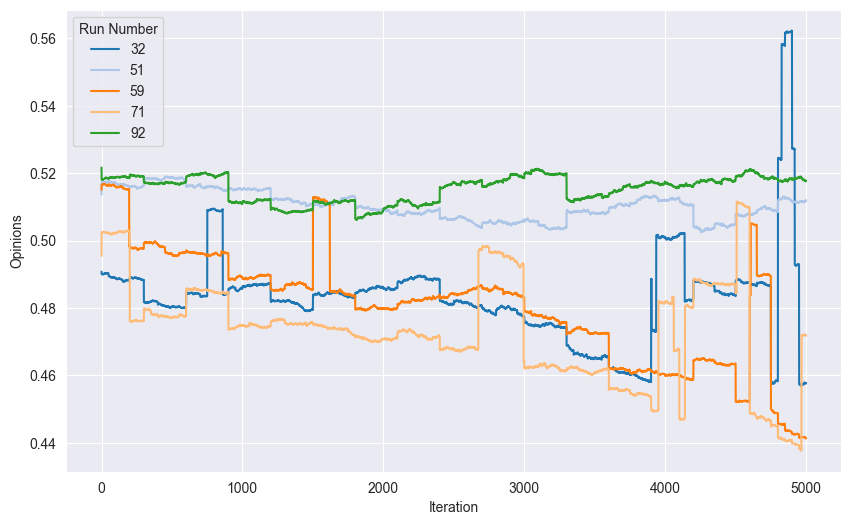

In [89]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_exploded, x='run_index', y='opinions', hue='run', palette='tab20', errorbar=None)
# plt.title(f'Baseline - Opinions of Turtles Over Iterations and Runs')
plt.xlabel('Iteration')
plt.ylabel('Opinions')
# plt.legend(title='Run Number')

new_labels = [32, 51, 59, 71, 92]
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=new_labels, title='Run Number')

plt.savefig(f'plots/lines/baseline-lines.png', dpi=300)
plt.show()

In [90]:
random_numbers = [random.randint(1, 99) for _ in range(5)]
print(random_numbers)

[92, 26, 49, 83, 29]
